# TP1 Calcul Scientifique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import solve

## Méthode des différences finies

Données :
- J : nombre de pas espace
- N : nombre de pas de temps
- T : borne temporelle
- a : coefficient >0 dans l'équation de diffusion

In [2]:
T = 1.0 # borne temporelle

In [3]:
def calcul_delta_t(delta_x, theta=0.5):
    # ------------------------------------------------------
    # calcul delta_t en fonction de theta et de delta_x,
    # en fonction des conditions de stabilité de Von Neumann
    # ------------------------------------------------------
    if theta >= 0.5:
        # print("aucune condition sur delta_t !")
        return 1/2*delta_x**2 *0.5  # *0.5 arbitraire
    if (theta < 0.5) & (theta >=0):
        return 0.95*(delta_x)**2/(2*(1-2*theta))  
        # le 0.95 pour éviter les erreurs d'arrondis qui sortent delta_t des conditions de stabilité
    print ("mauvaise valeur de theta")
    return 0

In [4]:
def calcul_matA(J, a=0):
    
    # calcule et retourne la matrice A
    
    delta_x = 1/J
    # créé la matrice A taille JxJ avec 2+a.delta_x**2 sur la diagonale
    matA = np.diagflat(np.full((1,J),2+a*delta_x**2))
    for i in range(J-1):
        matA[i+1,i]=-1
        matA[i,i+1]=-1
    matA[0,1]=-2
    matA = 1/delta_x**2 * matA
    return matA

In [5]:
def calcul_vectU_init(J):
    
    # calcule et retourne le vecteur U^0 des valeurs approchées à t=0
    
    vectU_init = np.zeros((J,1))
    delta_x = 1/J
    for i in range(J):
        vectU_init[i]=math.cos(math.pi/2*i*delta_x)
    return vectU_init    

In [6]:
calcul_vectU_init(5)

array([[1.        ],
       [0.95105652],
       [0.80901699],
       [0.58778525],
       [0.30901699]])

In [7]:
def affiche_solution_explicite(J=100,a=0,t=0.0):
    # affiche la solution explicite à l'instant t
    # on passe en paramètres le nombre de pas d'espace, le paramètre a>0, et l'instant t
    param = -(math.pi**2/4+a)
    u = [math.cos(math.pi/2*(x/J))*math.exp(param*t) for x in range(0,int(J))]
    # print(u)
    plt.figure(figsize=(5,5))
    axe_x = [(x/J) for x in range(0,int(J))]
    plt.plot(axe_x,u)
    axes = plt.gca()
    axes.set_ylim([0.0,1.1])
    plt.xlabel('espace x')
    plt.ylabel('valeur fonction')
    plt.title('solution exacte à t='+str(t)+' (a='+str(a)+')')
    plt.show()

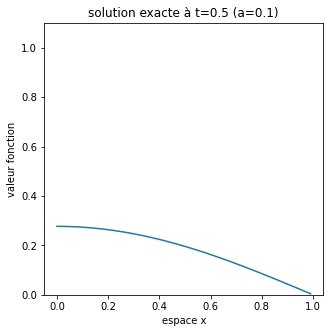

In [8]:
affiche_solution_explicite(100,a=0.1,t=0.5)

In [9]:
def affiche_solution_approchee(Un,J=100,t=0):
    # affiche la solution approchée Un
    plt.figure(figsize=(5,5))
    axe_x = [(x/J) for x in range(0,int(J))]
    plt.plot(axe_x,Un)
    axes = plt.gca()
    axes.set_ylim([0.0,1.1])
    plt.xlabel('espace x')
    plt.ylabel('valeur fonction')
    plt.title('solution approchée à t='+str(t))
    plt.show()

In [10]:
def vecteur_erreur(vectUn,J, t=0.0):
    # calcule et retourne vecteur erreur = U^n - (u(0,t),u(1/J,t),...u(J-1 / J,t))
    param = -(math.pi**2/4+a)
    exact = [math.cos(math.pi/2*(x/J))*math.exp(param*t) for x in range(0,int(J))]
    return [x-y for x,y in zip(vectUn,exact)]

In [11]:
a=0
J=100
t=0.2
param = -(math.pi**2/4+a)
exact = [math.cos(math.pi/2*(x/J))*math.exp(param*t) for x in range(0,int(J))]
print(vecteur_erreur(exact,100,t=0.2))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
def norme_inf(v):
    # retourne norme inf du vecteur v
    v_abs = [np.abs(x) for x in v ]
    return max(v_abs)

In [13]:
def run_theta_schema(J=100,T=1.0,a=0,theta=0.0):
    
    delta_x = 1.0/J
    delta_t = calcul_delta_t(delta_x, theta)
    N=int(T/delta_t) # nombre de pas de temps
    print('theta = ', theta)
    print('nombre pas de temps = '+str(N))
    print('delta_x =', delta_x)
    print('delta_t =', delta_t)
    matA = calcul_matA(J,a)
    I = np.diagflat(np.full((1,J),1)) # matrice identité JxJ
    mat_U_nplusun = (1/delta_t * I + theta * matA)
    mat_Un = 1/delta_t * I - (1-theta) * matA
    Un = calcul_vectU_init(J)  # vecteur U à t=0
    err_over_time = []
    
    for t in range(0,N):
        # print('instant t=',t/N)
        U_nplusun = np.linalg.solve(mat_U_nplusun,np.matmul(mat_Un,Un))
        nb_aff = 3  # nombre de courbes intérmédiaires que l'on veut afficher
        inter_aff = int(N/nb_aff)  # intervalle entre les affichages des courbes
        if t%inter_aff==0:
            temps=t/N
            affiche_solution_approchee(Un,J,temps)
            affiche_solution_explicite(J,a,temps)
        err = vecteur_erreur(U_nplusun,J,t/N)
        err_over_time = np.append(err_over_time,norme_inf(err)) # liste de la norme inf de l'erreur
        #print('erreur = ',max(err))
        Un = U_nplusun

    plt.figure(figsize=(10,10))
    axe_x = [t for t in range(0,int(N))]
    plt.plot(axe_x,err_over_time)
    axes = plt.gca()
    # axes.set_ylim([0.0,1.1])
    plt.xlabel('epoch')
    plt.ylabel('valeur')
    plt.title('norme inf de l"erreur (J='+str(J)+';theta='+str(theta)+';a='+str(a)+')')
    plt.grid()
    plt.show()
    # print("erreur en fin d'algo = "+str(norme_inf(err_over_time)))

theta =  0
nombre pas de temps = 21052
delta_x = 0.01
delta_t = 4.75e-05


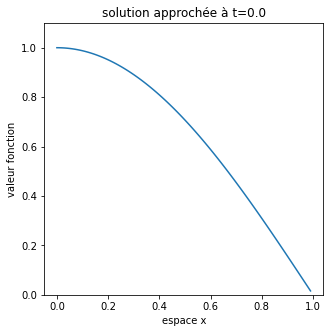

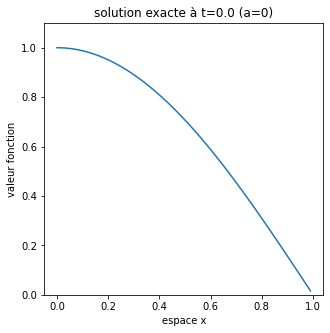

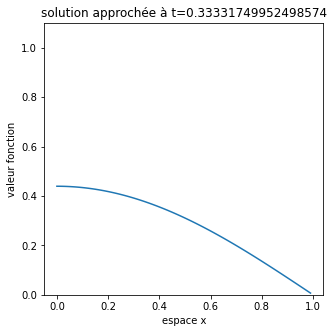

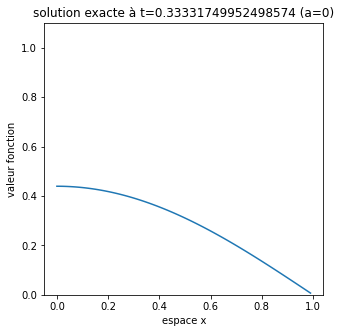

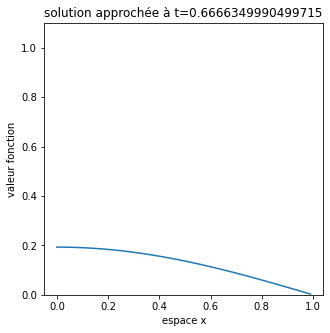

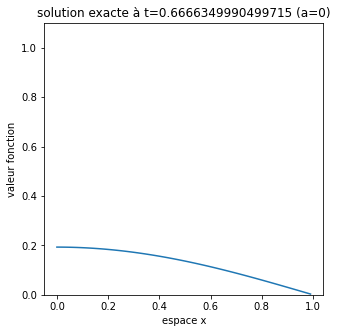

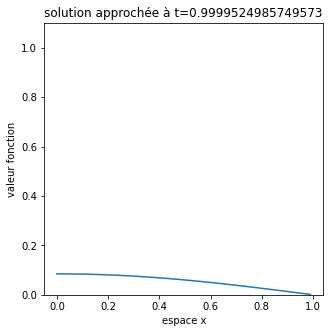

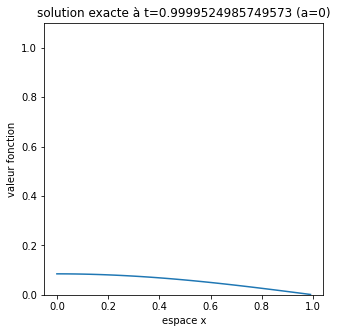

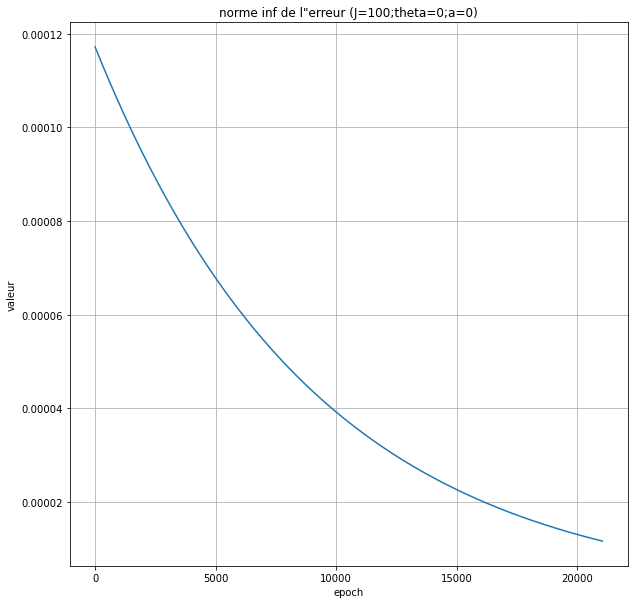

In [14]:
run_theta_schema(J=100,T=1.0,a=0,theta=0)

theta =  0.5
nombre pas de temps = 40000
delta_x = 0.01
delta_t = 2.5e-05


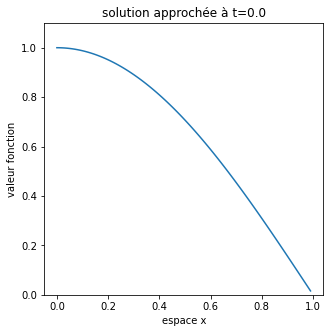

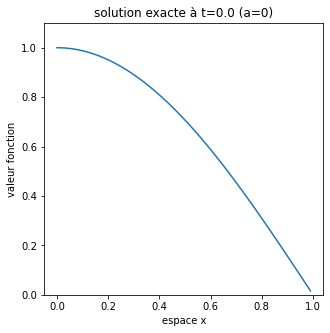

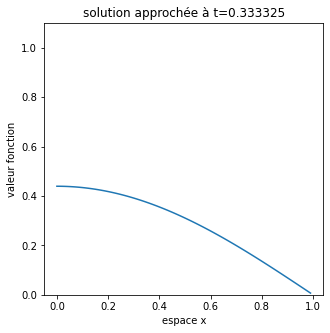

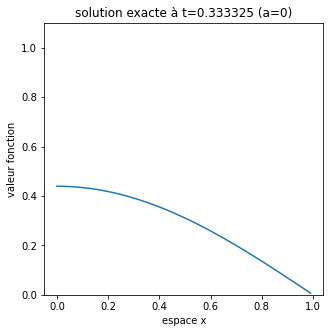

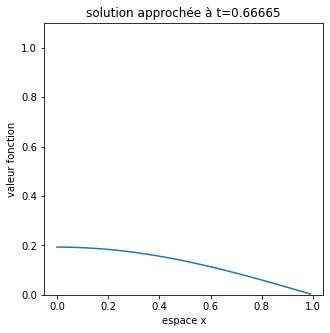

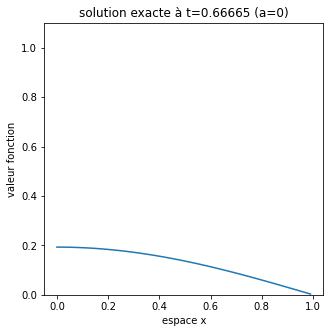

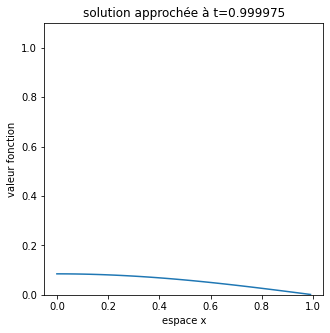

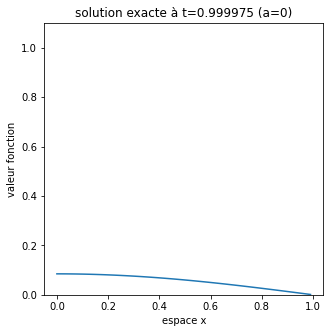

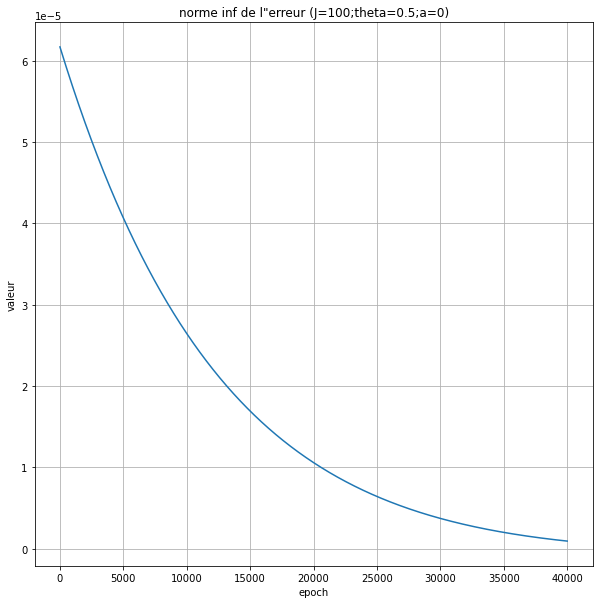

In [15]:
run_theta_schema(J=100,T=1.0,a=0,theta=0.5)

theta =  0.95
nombre pas de temps = 40000
delta_x = 0.01
delta_t = 2.5e-05


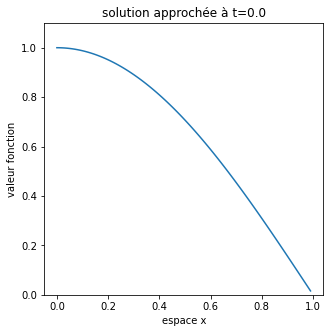

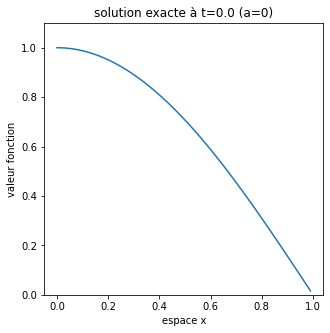

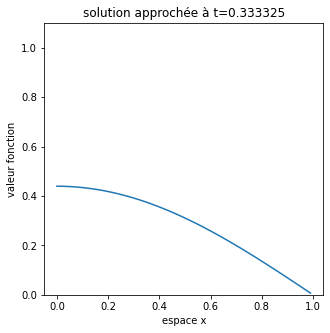

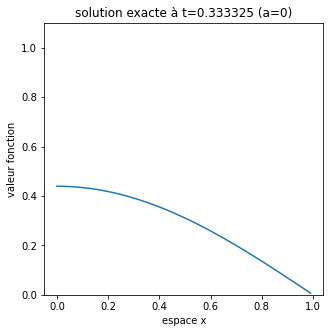

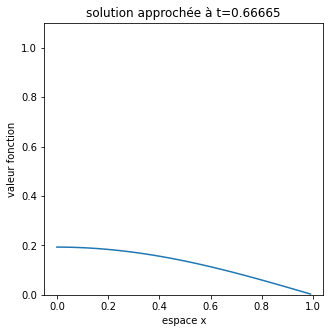

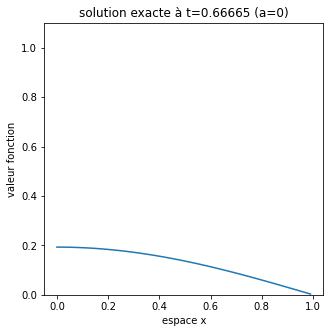

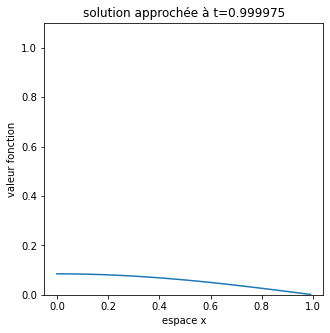

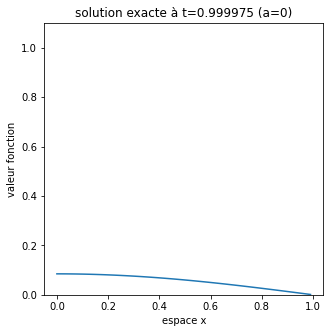

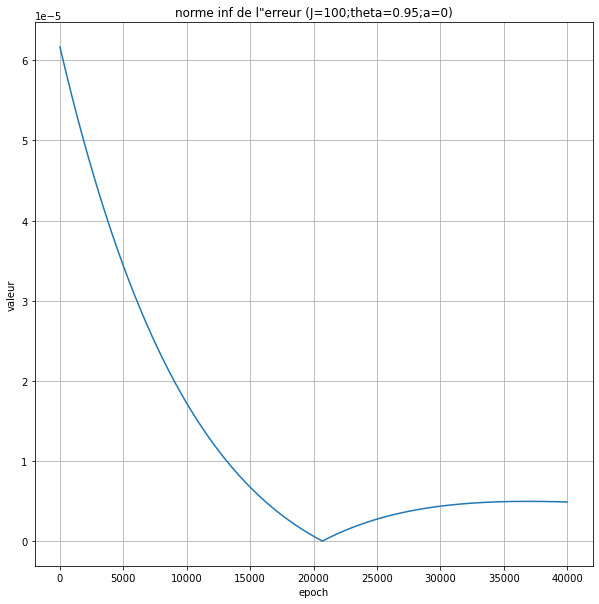

In [17]:
run_theta_schema(J=100,T=1.0,a=0,theta=0.95)

### Courbe erreur anormale, souci de consistance

## Elements finis d'ordre 2

Initialisation

In [30]:
T = 1.0
a = 0.0
J = 12 # nombre pas d'espace
N = 10000 # nombre pas de temps

In [31]:
delta_x = 1/J
delta_t = 1/N

Matrices élémentaires

In [32]:
M_elem = delta_x/30 * np.array(([4, 2, -1],
                               [2, 16, 2],
                               [-1, 2, 4]))

In [33]:
M_elem

array([[ 0.01111111,  0.00555556, -0.00277778],
       [ 0.00555556,  0.04444444,  0.00555556],
       [-0.00277778,  0.00555556,  0.01111111]])

In [34]:
K_elem = 1/(3*delta_x)* np.array(([7, -8, 1],
                                   [-8, 16, -8],
                                   [1, -8, 7]))

In [35]:
K_elem

array([[ 28., -32.,   4.],
       [-32.,  64., -32.],
       [  4., -32.,  28.]])

In [36]:
#----------------------------------------
# fonction élémentaire : additionne la matrice de masse élémentaire
# à la matrice de masse globale, en centrant à l'indice (i,i)
#----------------------------------------

def add_masse_elem(M,indice):
    # ajoute la matrice élémentaire de masse dans M[indice-1,indice+1]x[indice-1,indice+1]
    # M est en [0,2J-1] x [0,2J-1]
    # indice doit être dans [1,2J-2]
    # print("indice =", indice)
    for i in [-1, 0, 1]:
        if (indice+i)<=(2*J-1): # on doit tester pour ne pas essayer d'écrire en dehors de la matrice
            for j in [-1, 0, 1]:
                if (indice+j)<=(2*J-1): # on doit tester pour ne pas essayer d'écrire en dehors de la matrice
                    # print ("i = ",i," j = ", j, "on écrit M en ",(indice+i),(indice+j))
                    M[indice+i,indice+j] += M_elem[i+1,j+1]
    return M

In [37]:
#----------------------------------------
# fonction élémentaire : idem matrice rigidite
#----------------------------------------

def add_rigidite_elem(K,indice):
    # ajoute la matrice élémentaire de rigidité dans K[indice-1,indice+1]x[indice-1,indice+1]
    # K est en [0,2J-1] x [0,2J-1]
    # indice doit être dans [1,2J-2]
    for i in [-1, 0, 1]:
        if (indice+i)<=(2*J-1):
            for j in [-1, 0, 1]: 
                if (indice+j)<=(2*J-1):
                    K[indice+i,indice+j] += K_elem[i+1,j+1]
    return K

Fonction Assemblage Matrices M et K globales

In [38]:
M = np.zeros((2*J,2*J),dtype=float)
K = np.zeros((2*J,2*J),dtype=float)

In [39]:
for i in range(0,2*J-1,2):
    # la diagonale de M et de K est parcourue de (1,1) jusqu'à (2J-2, 2J-2), de deux cases en deux cases
    # print(i)
    M = add_masse_elem(M,i+1)
    K = add_rigidite_elem(K,i+1)

In [40]:
M.shape

(24, 24)

In [41]:
K.shape

(24, 24)

### $\theta$ schéma

In [42]:
# calcul des matrices du schéma
theta = 0.0
mat_u_nplusun = (1/delta_t)*M + theta*(K+a*M)
mat_u_n = (1/delta_t)*M - (1-theta)*(K+a*M)

In [43]:
# initialisation vecteur u_tilde
u_tilde_init = np.array([np.cos(np.pi/2*(x*(delta_x/2))) for x in range(0,2*J)])

In [44]:
# moteur
vect_err = np.zeros((2*J))

In [45]:
# init
param1 = -(math.pi**2/4+a)
u_tilde_n = u_tilde_init
err_over_time = []

In [46]:
def affiche_courbes(u_explicite,u_tilde_nplusun,delta_x):
    axe_x = [x for x in range(u_explicite.shape[0])]
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1,2,1)
    ax.plot(axe_x, u_explicite)
    ax.set_title("Explicite", fontsize=20)
    ax.set_ylim([0.0,1.1])
    ax = fig.add_subplot(1,2,2)
    ax.plot(axe_x, u_tilde_nplusun)
    ax.set_title("Approchée", fontsize=20)
    ax.set_ylim([0.0,1.1])
    plt.show()

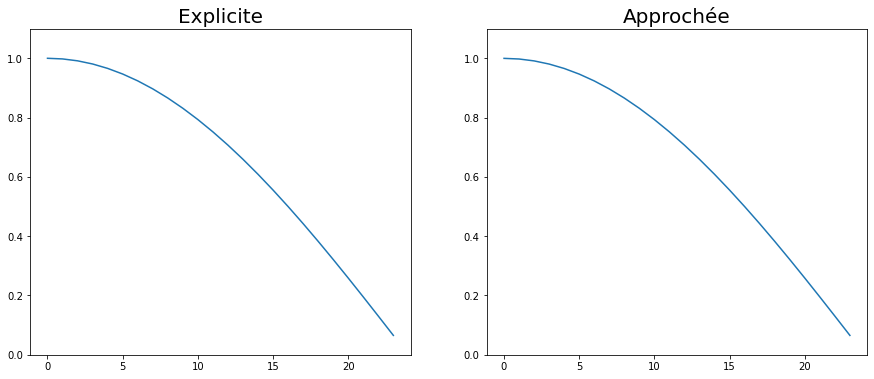

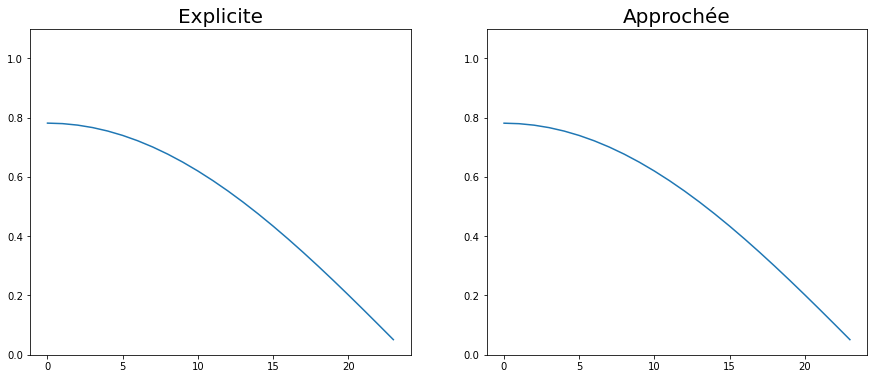

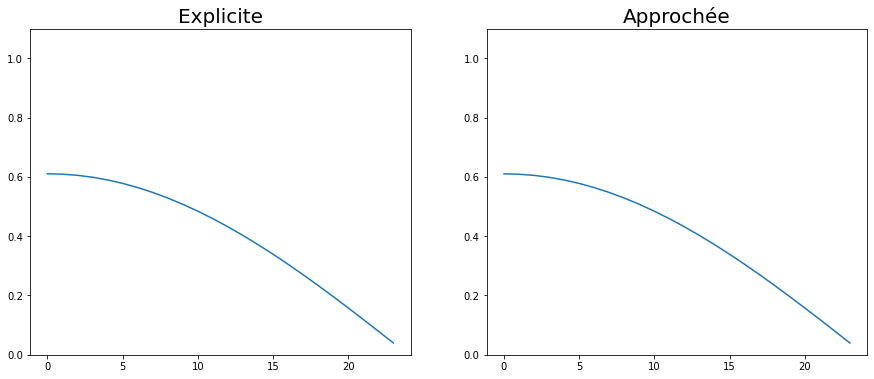

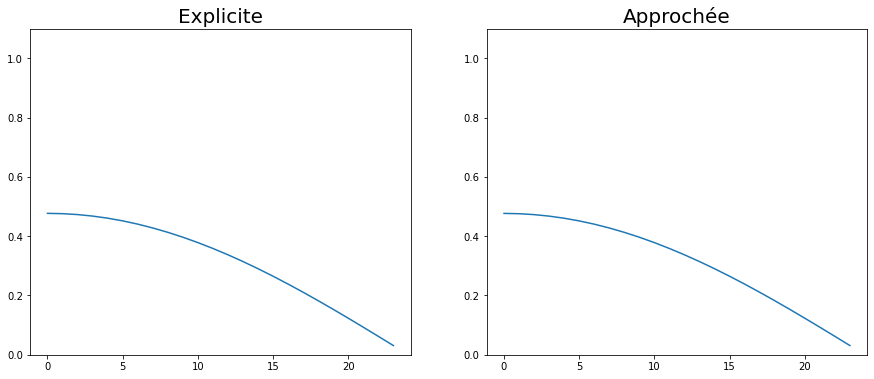

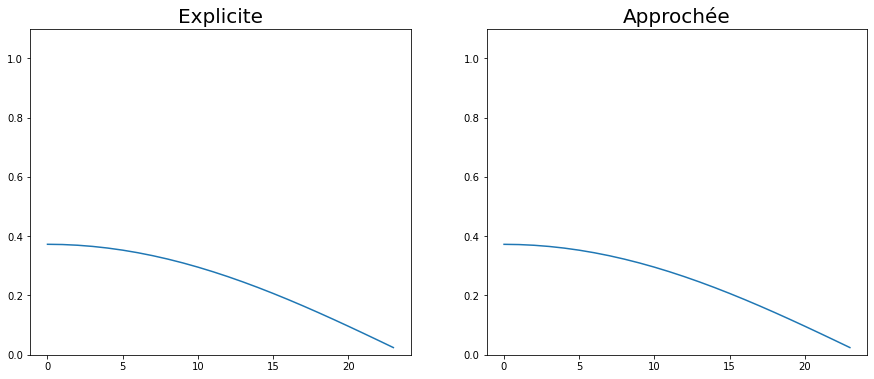

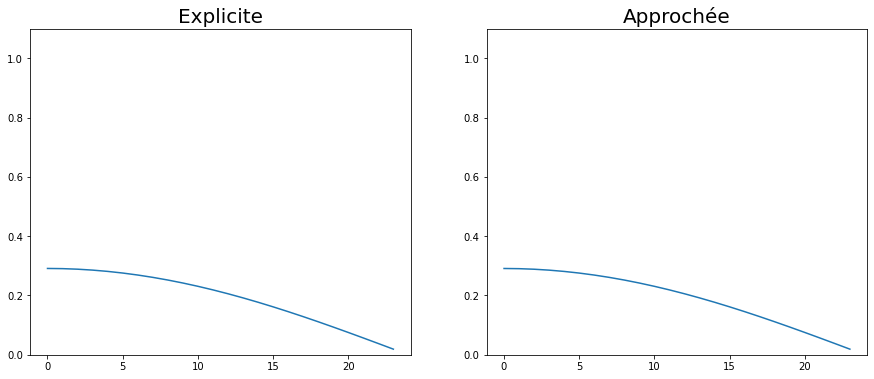

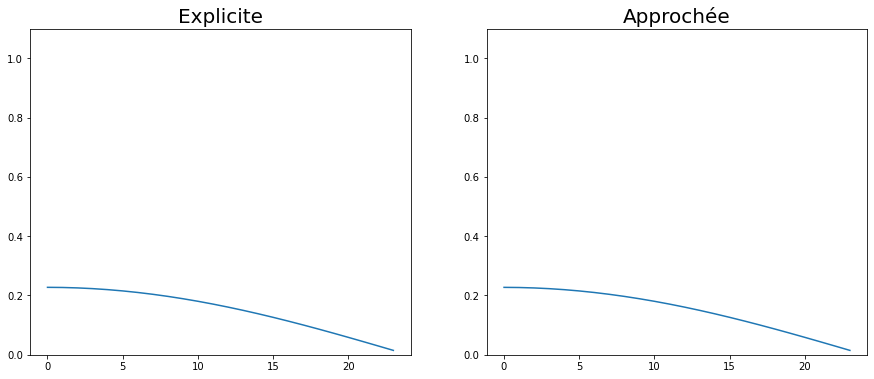

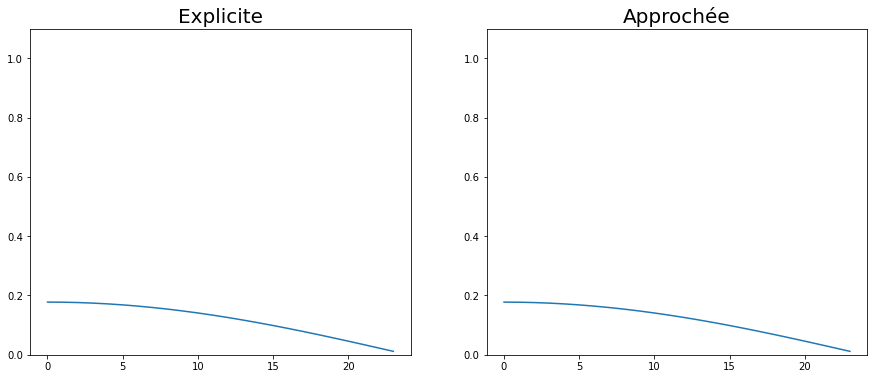

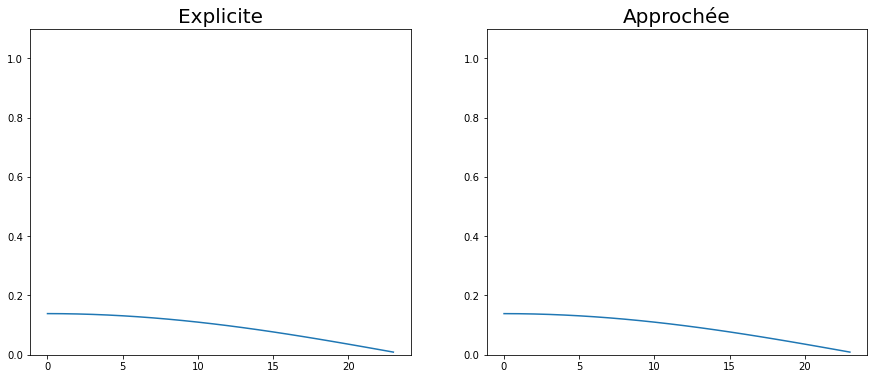

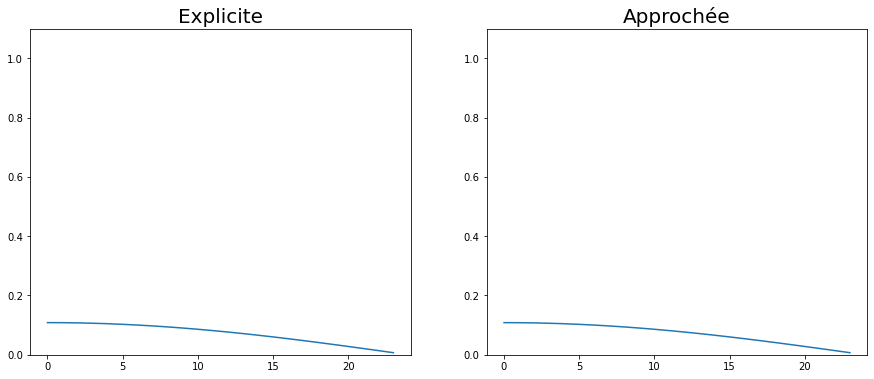

In [47]:
# moteur
for t in range(N):
    
    # calcule solution explicite
    t_reel = t/N
    param2 = np.exp(param1*t_reel)
    u_explicite = np.array([np.cos(np.pi/2*(x*(delta_x/2)))*param2 for x in range(0,2*J)])  
    
    u_tilde_nplusun = np.linalg.solve(mat_u_nplusun,np.matmul(mat_u_n,u_tilde_n))
    inter_aff = int(N/10)
    if t%inter_aff==0:
        affiche_courbes(u_explicite,u_tilde_nplusun,delta_x)
        #print("u_tilde_n = ")
        #print(u_tilde_n)
        #print("u_tilde_n+1 = ")
        #print(u_tilde_nplusun)
        #print("Erreur =")
        #print(vect_err)
    vect_err = u_explicite - u_tilde_nplusun
    err_over_time = np.append(err_over_time,(np.abs(vect_err)).max())
    u_tilde_n = u_tilde_nplusun

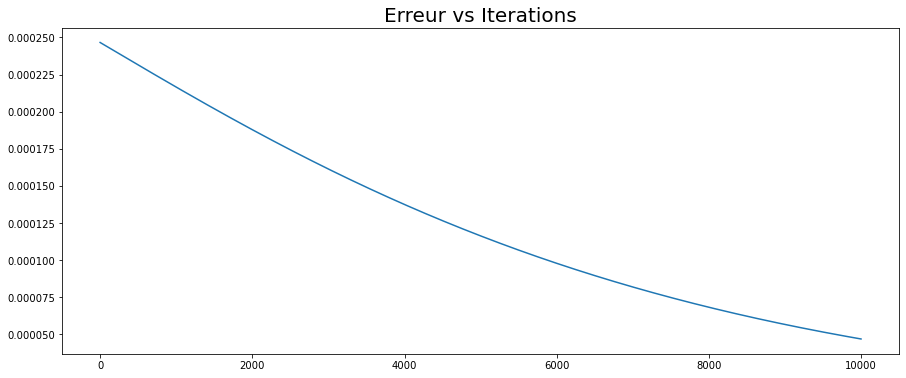

In [49]:
# affichage erreur
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)

axe_x = range(N)
ax.plot(axe_x, err_over_time)
ax.set_title("Erreur vs Iterations", fontsize=20)

plt.show()